# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

1. Business Objective/Problem Description - Develop a model that helps to identify key attributes of the Vehicle dataset , that help in determining price of a used car based on its features (e.g., make, model, year, mileage, condition, fuel type, transmission, and more). This involves conducting exploratory data analysis (EDA) to identify significant variables, followed by feature engineering and regression modeling techniques (such as linear regression).

2. Business Success - The ultimate goal is to understand the relationships between different features and identify features that influence car pricing. Specifically, we aim to:

• Explore relationships between the features and the target Price.
• Train and evaluate several regression models to predict the Price target.
• Compare model performance and identify the best approach for predicting high vs low Price, based on inventory.
• Draw insights on what factors are most important for determining a car’s fuel efficiency.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

We will begin by collecting Initial Data to effectively understand the dataset and prepare it for modeling using the following steps:
1.	Load and Inspect the Dataset
2. View the first few rows to understand the structure
3. Check data types and non-null counts
4. Use describe() function to view summary statistics for numerical features.




Next, we will explore the Data - 

1. Identify columns with missing data and quantify them (df.isnull().sum())
2. Determine which features are likely to not influence price and how they can support business decisions  and remove them
3. Detect Duplicates and Remove duplicate rows if any 
4. Visualize numerical features (like price and odometer) with scatterplots to identify outliers and remove them
5. Explore Categorical Variables. Review unique values in categorical features (df['make'].value_counts()) to understand variety and dominant brands.
6. Examine Distributions - Use histograms and value counts to understand distributions of numerical and categorical features.
7. Investigate Correlations - 
    •   Use a heatmap or correlation matrix to explore relationships between numerical features.
	•	Check if some features are highly correlated (e.g., age and mileage).

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.datasets import fetch_openml

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [97]:
# read Vehicles dataset
data = pd.read_csv('data/vehicles.csv')
data.head()



,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [98]:
# Describe Data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [99]:
# Determine null values per column
data.isnull().sum()


id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [101]:
# Check proportion of null values per column
data.isnull().sum()/426880

id              0.000000
region          0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
VIN             0.377254
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
state           0.000000
dtype: float64

price          0
odometer    4400
year        1205
dtype: int64
    odometer    year
27   57923.0  2014.0
28   71229.0  2010.0
29   19160.0  2020.0
30   41124.0  2017.0
31  128000.0  2013.0
27    33590
28    22590
29    39590
30    30990
31    15000
Name: price, dtype: int64


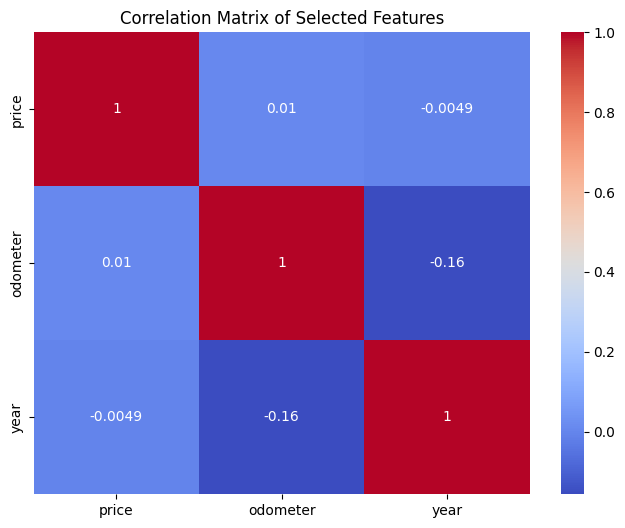

In [102]:
# First, select only the important features + target 'price'
selected_features = [
    'price',        # target
    'odometer',  # moderate correlation
    'year'          # optional but acceptable
]

# Create a new dataframe with just these columns
data_selected = data[selected_features].copy()

# Now, check missing values if any
print(data_selected.isnull().sum())

# (Optional) Drop rows with missing values in selected features
data_selected.dropna(inplace=True)

# Separate X and y for modeling
X = data_selected.drop('price', axis=1)
y = data_selected['price']

print(X.head())
print(y.head())

import seaborn as sns
import matplotlib.pyplot as plt

# For numerical features only, get correlations
corr_matrix = data_selected.corr()

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [103]:
# Delete columns with informative columns
data.drop(columns = ['id', 'VIN'], inplace=True)


In [104]:

# Drop duplicates
data = data.drop_duplicates()

data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370465 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        370465 non-null  object 
 1   price         370465 non-null  int64  
 2   year          369479 non-null  float64
 3   manufacturer  355246 non-null  object 
 4   model         365782 non-null  object 
 5   condition     229296 non-null  object 
 6   cylinders     219789 non-null  object 
 7   fuel          368028 non-null  object 
 8   odometer      367019 non-null  float64
 9   title_status  363768 non-null  object 
 10  transmission  368429 non-null  object 
 11  drive         258052 non-null  object 
 12  size          105757 non-null  object 
 13  type          291639 non-null  object 
 14  paint_color   261807 non-null  object 
 15  state         370465 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 48.0+ MB


<Axes: >

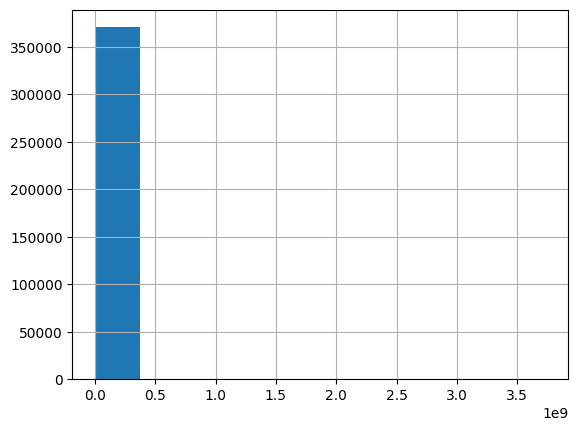

In [105]:
# check price histogram
data['price'].hist(bins=10)

<class 'pandas.core.frame.DataFrame'>
Index: 338133 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        338133 non-null  object 
 1   price         338133 non-null  int64  
 2   year          337169 non-null  float64
 3   manufacturer  324205 non-null  object 
 4   model         334029 non-null  object 
 5   condition     218502 non-null  object 
 6   cylinders     202567 non-null  object 
 7   fuel          336042 non-null  object 
 8   odometer      336460 non-null  float64
 9   title_status  332474 non-null  object 
 10  transmission  336587 non-null  object 
 11  drive         235490 non-null  object 
 12  size          96446 non-null   object 
 13  type          265825 non-null  object 
 14  paint_color   243297 non-null  object 
 15  state         338133 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 43.9+ MB


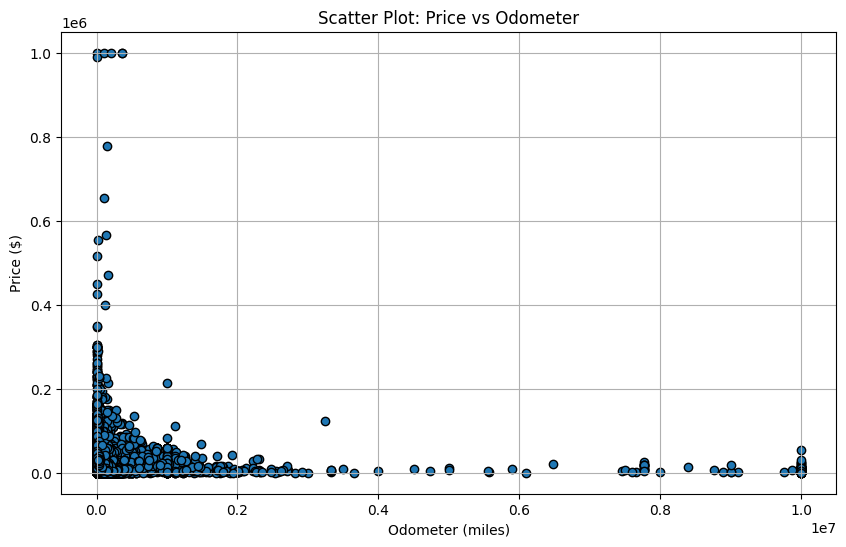

In [106]:
import matplotlib.pyplot as plt

data = data[data['price'] <= 1000000]
data = data[data['price'] >= 500]
data.info()
# Scatter plot of Price vs Odometer
plt.figure(figsize=(10,6))
plt.scatter(data['odometer'], data['price'], edgecolors='k')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price ($)')
plt.title('Scatter Plot: Price vs Odometer')
plt.grid(True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 338114 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        338114 non-null  object 
 1   price         338114 non-null  int64  
 2   year          337150 non-null  float64
 3   manufacturer  324193 non-null  object 
 4   model         334010 non-null  object 
 5   condition     218495 non-null  object 
 6   cylinders     202559 non-null  object 
 7   fuel          336023 non-null  object 
 8   odometer      336441 non-null  float64
 9   title_status  332455 non-null  object 
 10  transmission  336569 non-null  object 
 11  drive         235486 non-null  object 
 12  size          96444 non-null   object 
 13  type          265816 non-null  object 
 14  paint_color   243288 non-null  object 
 15  state         338114 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 43.9+ MB


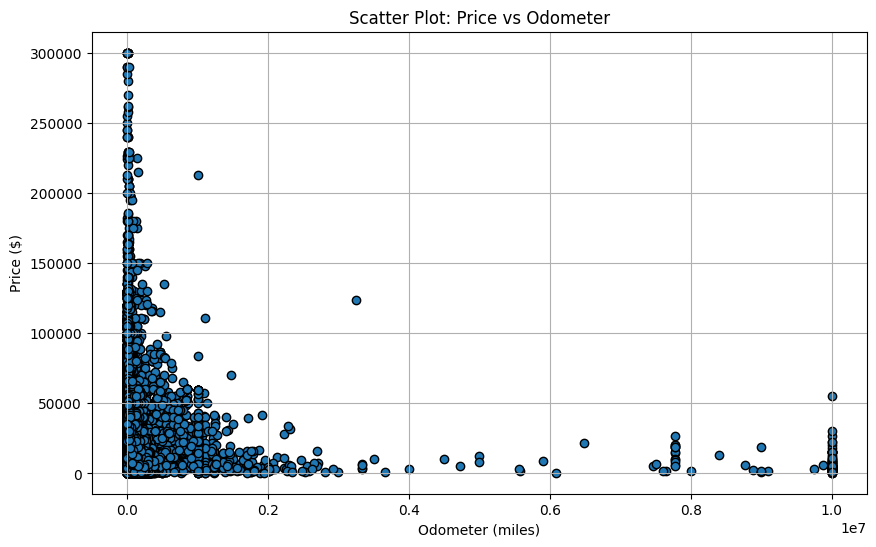

In [107]:
import matplotlib.pyplot as plt
data = data[data['price'] <= 300000]
data.info()
# Scatter plot of Price vs Odometer
plt.figure(figsize=(10,6))
plt.scatter(data['odometer'], data['price'], edgecolors='k')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price ($)')
plt.title('Scatter Plot: Price vs Odometer')
plt.grid(True)
plt.show()

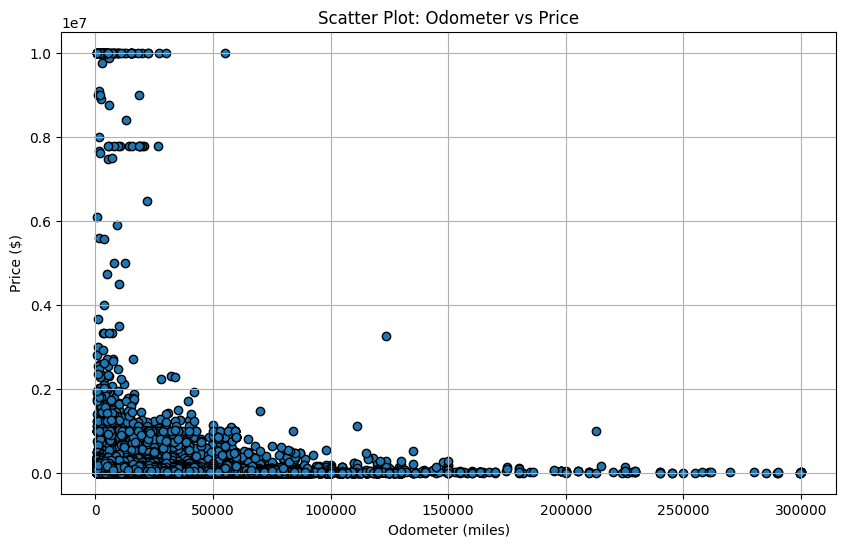

In [108]:
# Scatter plot of Price vs Odometer
plt.figure(figsize=(10,6))
plt.scatter( data['price'], data['odometer'],edgecolors='k')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price ($)')
plt.title('Scatter Plot: Odometer vs Price')
plt.grid(True)
plt.show()

In [109]:
#Remove rows with odometer > 400,000
data = data[data['odometer'] <= 400000]

#Remove rows with odometer showing rounded values as that data is not realistic
data = data[data['odometer'] % 10000 != 0]

In [110]:
# Delete rows with both Manufacturer and Model as missing

# drop rows where both model and manufacturer are missing
data = data.dropna(subset=['model', 'manufacturer'], how='all')

In [111]:
# Drop rows where model is populated but manufacturer is missing
data = data.drop(data[(data['model'].notna()) & (data['manufacturer'].isna())].index)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304957 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        304957 non-null  object 
 1   price         304957 non-null  int64  
 2   year          304954 non-null  float64
 3   manufacturer  304957 non-null  object 
 4   model         301648 non-null  object 
 5   condition     195433 non-null  object 
 6   cylinders     182131 non-null  object 
 7   fuel          303428 non-null  object 
 8   odometer      304957 non-null  float64
 9   title_status  300075 non-null  object 
 10  transmission  303727 non-null  object 
 11  drive         214700 non-null  object 
 12  size          84344 non-null   object 
 13  type          244948 non-null  object 
 14  paint_color   221744 non-null  object 
 15  state         304957 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 39.6+ MB


In [112]:
# clean up model column for invalid values
data = data[data['model'] != '#NAME?']

# Delete rows where 'model' contains a '$' character
data = data[~data['model'].str.contains(r'\$', na=False)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304917 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        304917 non-null  object 
 1   price         304917 non-null  int64  
 2   year          304914 non-null  float64
 3   manufacturer  304917 non-null  object 
 4   model         301608 non-null  object 
 5   condition     195423 non-null  object 
 6   cylinders     182095 non-null  object 
 7   fuel          303388 non-null  object 
 8   odometer      304917 non-null  float64
 9   title_status  300035 non-null  object 
 10  transmission  303687 non-null  object 
 11  drive         214663 non-null  object 
 12  size          84337 non-null   object 
 13  type          244910 non-null  object 
 14  paint_color   221707 non-null  object 
 15  state         304917 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 39.5+ MB


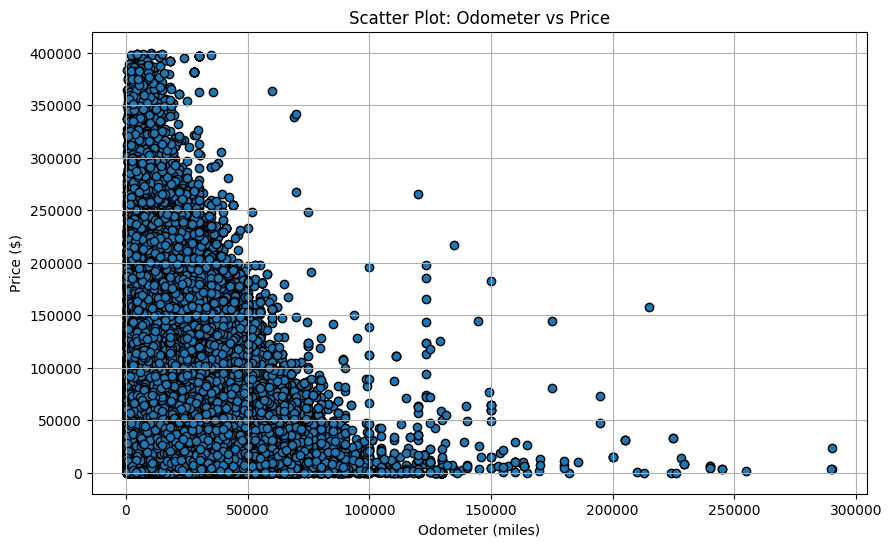

In [113]:
# Scatter plot of Price vs Odometer
plt.figure(figsize=(10,6))
plt.scatter( data['price'], data['odometer'],edgecolors='k')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price ($)')
plt.title('Scatter Plot: Odometer vs Price')
plt.grid(True)
plt.show()

In [114]:
#Remove rows with missing mileage 
data = data[data['odometer'].notna()]

#Remove rows with missing condition
data = data[data['condition'].notna()]

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195423 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        195423 non-null  object 
 1   price         195423 non-null  int64  
 2   year          195423 non-null  float64
 3   manufacturer  195423 non-null  object 
 4   model         193849 non-null  object 
 5   condition     195423 non-null  object 
 6   cylinders     137777 non-null  object 
 7   fuel          195411 non-null  object 
 8   odometer      195423 non-null  float64
 9   title_status  191889 non-null  object 
 10  transmission  195404 non-null  object 
 11  drive         147300 non-null  object 
 12  size          69744 non-null   object 
 13  type          172474 non-null  object 
 14  paint_color   157357 non-null  object 
 15  state         195423 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 25.3+ MB


In [87]:
# Fill blank and 'other' values with 0
data = data.replace('other', 0)
data = data.fillna(0)

data.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

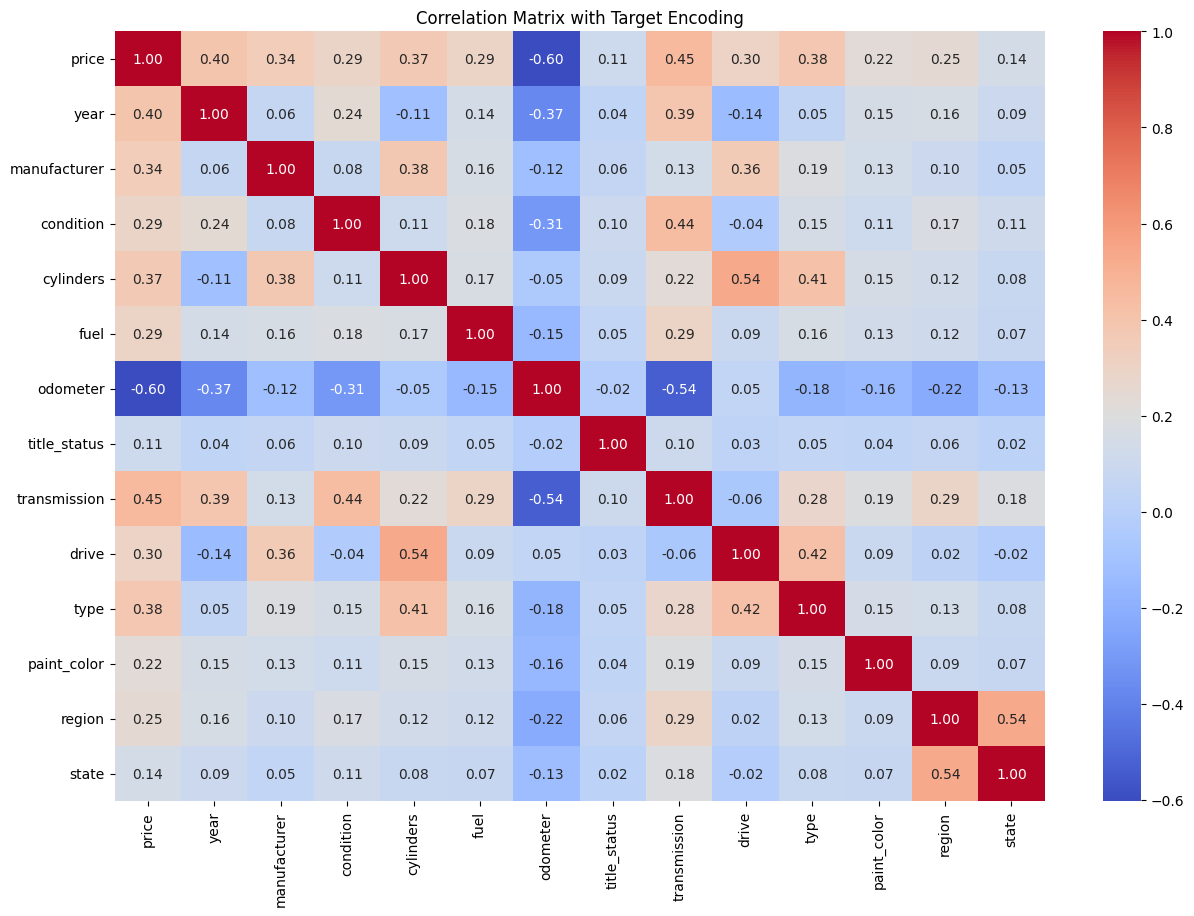

Top Features correlated with Price:
odometer        0.603334
transmission    0.453564
year            0.395070
type            0.384902
cylinders       0.367948
manufacturer    0.343691
drive           0.301826
fuel            0.294666
condition       0.286643
region          0.248420
paint_color     0.223941
state           0.137250
title_status    0.105723
Name: price, dtype: float64


In [115]:
# Encode columns to generate correlation atrix after data clean up
from sklearn.preprocessing import OrdinalEncoder

data_for_corr = data.copy()

features_to_use = [
    'price', 'year', 'manufacturer', 'condition', 'cylinders',
    'fuel', 'odometer', 'title_status', 'transmission', 'drive',
    'type', 'paint_color', 'region', 'state'
]

# Keep only selected features
data_selected = data[features_to_use].copy()

# Now apply target encoding to categorical columns
categorical_cols = ['manufacturer', 'condition', 'cylinders',
                    'fuel', 'title_status', 'transmission', 'drive',
                    'type', 'paint_color', 'region', 'state']

# Encode categorical columns by their mean price
for col in categorical_cols:
    mapping = data_selected.groupby(col)['price'].mean()
    data_selected[col] = data_selected[col].map(mapping)

# Now, correlation matrix will work!
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = data_selected.corr()

# Plot
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Target Encoding')
plt.show()

# Correlation of all features with 'price'
price_corr = corr_matrix['price'].abs().sort_values(ascending=False)

# Display top 10 features most correlated with price
print("Top Features correlated with Price:")
print(price_corr[1:14])  # skip the first one (price correlated with itself)


In [116]:
# Clean up cylinders column and convert to numeric value
data.loc[data['cylinders'] == 'other', 'cylinders'] = '0 cylinders'


data['new_cylinders'] = data['cylinders'].str.extract(r'(\d+)')
data['new_cylinders'] = data['new_cylinders'].fillna(0)
data['new_cylinders'] = data['new_cylinders'].astype(int)

print(data['new_cylinders'])

27        8
28        8
29        8
30        8
31        6
         ..
426875    6
426876    0
426877    0
426878    6
426879    0
Name: new_cylinders, Length: 195423, dtype: int64


Verify Data Quality
Data Quality Report

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

1. Data Cleaning and Integrity Check - Delete any irrelevant data
2. Feature Engineering	-	Create New Features:
	•	Age of the car = Current Year - Year of Manufacture.
	•	Mileage per year = Mileage / Age.
	•	Is luxury brand = binary flag for known luxury makes (e.g., BMW, Mercedes).
	
3. Generate correlation Matrix and select Features with higher correlation > 0.3 to include in the model
4. Encoding Categorical Variables
	•	Use One-Hot Encoding for categorical variables (e.g., make, type, fuel, transmission).
	•	Use Ordinal Encoding for variables with meaningful order (e.g., condition if it follows a scale).

4. Feature Transformation
	•	Use Imputer to handle missing values 
	•	Standardize or Normalize features 

5. Train-Test Split
	•	Split the dataset into training and test sets (e.g., 80/20 split) using train_test_split from sklearn.model_selection.

6. Pipeline Setup
	•	Use sklearn.pipeline.Pipeline to encapsulate all preprocessing steps, ensuring consistent transformation during model training and prediction.

In [117]:
# Feature Engineering

# Add new luxury cars column
data['luxurycar'] = 0
lux_count = (data['luxurycar'] == 0).sum()
valid_values = ['audi', 'bmw', 'ferrari', 'mercedes-benz', 'alfa-romeo', 'porsche']
#data['luxurycar'] = data['manufacturer'].where(data['manufacturer'].isin(valid_values), 1)
data['luxurycar'] = data['manufacturer'].apply(lambda x: 1 if x in valid_values else 0)
lux_count0 = (data['luxurycar'] == 0).sum()
lux_count1 = (data['luxurycar'] == 1).sum()
print(lux_count,lux_count0, lux_count1)

195423 176268 19155


In [118]:
# Calculate Car Age and Mileage per Year
from datetime import date
today = date.today()
data['year'] = data['year'].astype(int)
data['car_age'] = today.year - data['year']
data['car_age'] = np.where(data['car_age'] < 0, 0, data['car_age'])



#data['mileage'] = data['odometer'] - data['car_age']
data['odometer'] = data['odometer'].astype(int)
data['mileage_per_yr'] = np.where(data['car_age'] == 0, 0, data['odometer'] / data['car_age']).round().astype(int)
print(data['mileage_per_yr'])


27         5266
28         4749
29         3832
30         5140
31        10667
          ...  
426875     5371
426876     2406
426877      835
426878     4302
426879     3786
Name: mileage_per_yr, Length: 195423, dtype: int64


In [119]:
# Calculate odometer groups
odometergrps = [0, 50000, 100000, 150000, 200000]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k']
data['odometer_group'] = pd.cut(data['odometer'], bins=odometergrps, labels=labels)
data.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,drive,size,type,paint_color,state,new_cylinders,luxurycar,car_age,mileage_per_yr,odometer_group
27,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,clean,...,NaN,NaN,pickup,white,al,8,0,11,5266,50k-100k
28,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229,clean,...,NaN,NaN,pickup,blue,al,8,0,15,4749,50k-100k
29,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,clean,...,NaN,NaN,pickup,red,al,8,0,5,3832,0-50k
30,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124,clean,...,NaN,NaN,pickup,red,al,8,0,8,5140,0-50k
31,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000,clean,...,rwd,full-size,truck,black,al,6,0,12,10667,100k-150k


In [120]:
# Delete cars data with used cars > 30 yrs old
data = data[data['car_age'] != 30]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194795 entries, 27 to 426879
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   region          194795 non-null  object  
 1   price           194795 non-null  int64   
 2   year            194795 non-null  int64   
 3   manufacturer    194795 non-null  object  
 4   model           193252 non-null  object  
 5   condition       194795 non-null  object  
 6   cylinders       137236 non-null  object  
 7   fuel            194783 non-null  object  
 8   odometer        194795 non-null  int64   
 9   title_status    191261 non-null  object  
 10  transmission    194776 non-null  object  
 11  drive           146774 non-null  object  
 12  size            69376 non-null   object  
 13  type            171992 non-null  object  
 14  paint_color     156829 non-null  object  
 15  state           194795 non-null  object  
 16  new_cylinders   194795 non-null  int64   


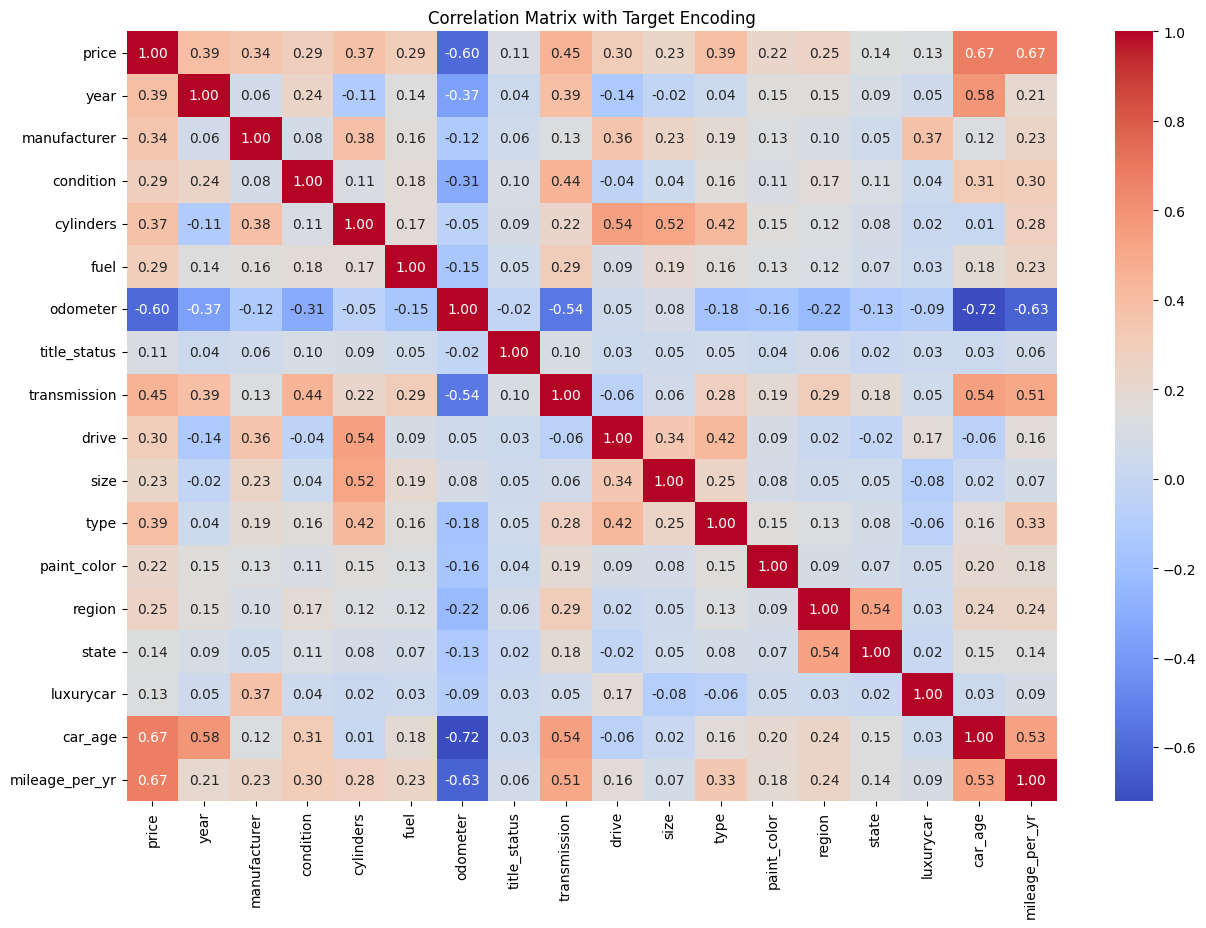

Top Features correlated with Price:
mileage_per_yr    0.673612
car_age           0.673542
odometer          0.603221
transmission      0.453222
year              0.393410
type              0.385920
cylinders         0.370068
manufacturer      0.344431
drive             0.303597
fuel              0.294888
condition         0.286848
region            0.248677
size              0.230690
Name: price, dtype: float64


In [121]:
# Build correlation matrix skipping region and model columns

from sklearn.preprocessing import OrdinalEncoder

data_for_corr = data.copy()

features_to_use = [
    'price', 'year', 'manufacturer', 'condition', 'cylinders',
    'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
    'type', 'paint_color', 'region', 'state', 'luxurycar', 'car_age', 'mileage_per_yr'
]

# Keep only selected features
data_selected = data[features_to_use].copy()

# Now apply target encoding to categorical columns
categorical_cols = ['manufacturer', 'condition', 'cylinders',
                    'fuel', 'title_status', 'transmission', 'drive', 'size',
                    'type', 'paint_color', 'region', 'state', 'luxurycar', 'car_age', 'mileage_per_yr']

# Encode categorical columns by their mean price
for col in categorical_cols:
    mapping = data_selected.groupby(col)['price'].mean()
    data_selected[col] = data_selected[col].map(mapping)

# Now, correlation matrix will work!
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = data_selected.corr()

# Plot
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Target Encoding')
plt.show()

# Correlation of all features with 'price'
price_corr = corr_matrix['price'].abs().sort_values(ascending=False)

# Display top 10 features most correlated with price
print("Top Features correlated with Price:")
print(price_corr[1:14])  # skip the first one (price correlated with itself)


In [122]:
# Building a model on highly correlated features with price i.e. corr > 0.3 as shown in above correlation matrix output

    # Encoding Categorical, ordinal and numeric  Variables
    categorical_features = [ 'transmission', 'type','size',  'manufacturer', 'drive']

    #Specify the order for the "condition" column
    condition_order = ['salvage', 'fair', 'good', 'excellent', 'like new', 'new']  # Replace with actual domain order
    ordinal_features = ['condition']  # if this follows an ordered scale


    #for col in categorical_features + ordinal_features:
    for col in categorical_features :
        data[col] = data[col].astype(str)


    # 4. Feature Transformation
    numerical_features = ['mileage_per_yr', 'car_age', 'odometer', 'year', 'new_cylinders']



IndentationError: unexpected indent (3435378666.py, line 4)

In [123]:
# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[condition_order]))  # Manually specify the order
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features), 
    ('ord', ordinal_transformer, ordinal_features)
])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['mileage_per_yr', 'car_age', 'odometer',
                                  'year', 'new_cylinders']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['transmission', 'type', 'size',
                                  'manufacturer', 'drive']),
                                ('ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]))]),
                                 ['condition'])])

In [124]:
# Train-Test Split
X = data.drop(columns=['price'])
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Build Multiple Regression Models

a. Linear Regression
b. Ridge Regression Regularized Model
c. Lasso Regression Regularized Model


In [125]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV


# Linear Regression
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Set up Ridge and Lasso with GridSearchCV
alpha_range = [0.01, 0.1, 1, 10, 100]



# Ridge Regression
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())  # alpha is the regularization strength
])

# Lasso Regression
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())  # alpha is the regularization strength
])

# Set up the parameter grid for Ridge and Lasso
ridge_param_grid = {'regressor__alpha': alpha_range}
lasso_param_grid = {'regressor__alpha': alpha_range}

# Set up GridSearchCV for Ridge and Lasso
ridge_search = GridSearchCV(ridge_model, ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_search = GridSearchCV(lasso_model, lasso_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the models to find the best alpha using GridSearchCV
ridge_search.fit(X_train, y_train)
lasso_search.fit(X_train, y_train)

# Get the best alpha values
best_ridge_alpha = ridge_search.best_params_['regressor__alpha']
best_lasso_alpha = lasso_search.best_params_['regressor__alpha']

# Print best alpha values
print(f"Best alpha for Ridge: {best_ridge_alpha}")
print(f"Best alpha for Lasso: {best_lasso_alpha}")

# Predict using the best models
ridge_best_model = ridge_search.best_estimator_
lasso_best_model = lasso_search.best_estimator_

y_pred_ridge = ridge_best_model.predict(X_test)  # Use the best model for Ridge
y_pred_lasso = lasso_best_model.predict(X_test)  # Use the best model for Lasso


# Evaluate the models using Mean Squared Error (MSE)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print(f"Ridge Test MSE: {ridge_mse:.4f}")
print(f"Lasso Test MSE: {lasso_mse:.4f}")



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1599676300127.7378, tolerance: 2343991051.7153697
  model = cd_fast.sparse_enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1561338885924.479, tolerance: 2307823993.655943
  model = cd_fast.sparse_enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1594971801491.185, tolerance: 2333051194.728475
  model = cd_fast.sparse_

Best alpha for Ridge: 1
Best alpha for Lasso: 0.1
Ridge Test MSE: 75028807.1998
Lasso Test MSE: 75027743.8530


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 426991457820.084, tolerance: 2906970925.0382066
  model = cd_fast.sparse_enet_coordinate_descent(


In [126]:
# Get the coefficients for each model

# For Linear Regression
lr_coefficients = lr_model.named_steps['regressor'].coef_


# For Ridge Regression
ridge_coefficients = ridge_best_model.named_steps['regressor'].coef_

# For Lasso Regression
lasso_coefficients = lasso_best_model.named_steps['regressor'].coef_

In [127]:
# Get Linear Regression feature names after preprocessing
# For categorical features after OneHotEncoding
encoded_columns = lr_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)

# Ensure "condition" is included by checking its encoding
#condition_encoded = lr_model.named_steps['preprocessor'].transformers_[2][1].named_steps['ordinal'].categories_[0]
#condition_column_names = [f'condition_{value}' for value in condition_encoded]
all_feature_names = numerical_features + list(encoded_columns) +  ordinal_features


print(all_feature_names, len(all_feature_names) )

# Ensure the length of all_feature_names matches the number of coefficients
assert len(all_feature_names) == len(lr_coefficients), "Feature length does not match coefficient length."

# Create a DataFrame for coefficients
coef_df_lr = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': lr_coefficients
})

# Sort coefficients by absolute value to find most influential features
coef_df_lr['abs_coefficient'] = coef_df_lr['Coefficient'].abs()
coef_df_lr = coef_df_lr.sort_values(by='abs_coefficient', ascending=False)


print(coef_df_lr.head(10))  # Top 10 most influential features

['mileage_per_yr', 'car_age', 'odometer', 'year', 'new_cylinders', 'transmission_automatic', 'transmission_manual', 'transmission_other', 'type_SUV', 'type_bus', 'type_convertible', 'type_coupe', 'type_hatchback', 'type_mini-van', 'type_offroad', 'type_other', 'type_pickup', 'type_sedan', 'type_truck', 'type_van', 'type_wagon', 'size_compact', 'size_full-size', 'size_mid-size', 'size_sub-compact', 'manufacturer_acura', 'manufacturer_alfa-romeo', 'manufacturer_aston-martin', 'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chevrolet', 'manufacturer_chrysler', 'manufacturer_datsun', 'manufacturer_dodge', 'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_ford', 'manufacturer_gmc', 'manufacturer_harley-davidson', 'manufacturer_honda', 'manufacturer_hyundai', 'manufacturer_infiniti', 'manufacturer_jaguar', 'manufacturer_jeep', 'manufacturer_kia', 'manufacturer_land rover', 'manufacturer_lexus', 'manufacturer_lincoln', 'manufactur

In [128]:


# Get Ridge feature names after preprocessing
# For categorical features after OneHotEncoding
encoded_columns = ridge_best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine feature names into one list (numeric + categorical + ordinal)
all_feature_names = numerical_features + list(encoded_columns) +  ordinal_features

# Ensure the length of all_feature_names matches the number of coefficients
assert len(all_feature_names) == len(ridge_coefficients), "Feature length does not match coefficient length."

# Create a DataFrame for coefficients
coef_df_ridge = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': ridge_coefficients
})

# Sort coefficients by absolute value to find most influential features
coef_df_ridge['abs_coefficient'] = coef_df_ridge['Coefficient'].abs()
coef_df_ridge = coef_df_ridge.sort_values(by='abs_coefficient', ascending=False)

# Print top features
print(coef_df_ridge.head(10))  # Top 10 most influential features


                         Feature   Coefficient  abs_coefficient
36          manufacturer_ferrari  92274.779234     92274.779234
27     manufacturer_aston-martin  18358.769542     18358.769542
63            manufacturer_tesla  10394.750512     10394.750512
37             manufacturer_fiat  -9902.949522      9902.949522
40  manufacturer_harley-davidson  -9673.313194      9673.313194
2                       odometer  -8596.342695      8596.342695
54       manufacturer_mitsubishi  -7954.712333      7954.712333
58          manufacturer_porsche   7766.752181      7766.752181
46              manufacturer_kia  -7690.782544      7690.782544
33         manufacturer_chrysler  -7353.086285      7353.086285


In [129]:
# Get Lasso feature names after preprocessing
# For categorical features after OneHotEncoding
encoded_columns = lasso_best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine feature names into one list (numeric + categorical + ordinal)
all_feature_names = numerical_features + list(encoded_columns) +  ordinal_features

# Ensure the length of all_feature_names matches the number of coefficients
assert len(all_feature_names) == len(lasso_coefficients), "Feature length does not match coefficient length."

# Create a DataFrame for coefficients
coef_df_lasso = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': lasso_coefficients
})

# Sort coefficients by absolute value to find most influential features
coef_df_lasso['abs_coefficient'] = coef_df_lasso['Coefficient'].abs()
coef_df_lasso = coef_df_lasso.sort_values(by='abs_coefficient', ascending=False)

# Print top features
print(coef_df_lasso.head(10))  # Top 10 most influential features



                         Feature   Coefficient  abs_coefficient
36          manufacturer_ferrari  98769.434239     98769.434239
27     manufacturer_aston-martin  24330.138020     24330.138020
63            manufacturer_tesla  13127.758143     13127.758143
58          manufacturer_porsche  10449.431467     10449.431467
2                       odometer  -8596.366300      8596.366300
37             manufacturer_fiat  -7192.994846      7192.994846
40  manufacturer_harley-davidson  -6843.101952      6843.101952
60            manufacturer_rover   6143.380223      6143.380223
54       manufacturer_mitsubishi  -5227.871996      5227.871996
46              manufacturer_kia  -4981.103719      4981.103719


In [130]:


# Display top features
print("Top Features for Ridge Regression")
print(coef_df_ridge.head())

print("Top Features for Linear Regression")
print(coef_df_lr.head())

print("Top Features for Lasso Regression")
print(coef_df_lasso.head())

Top Features for Ridge Regression
                         Feature   Coefficient  abs_coefficient
36          manufacturer_ferrari  92274.779234     92274.779234
27     manufacturer_aston-martin  18358.769542     18358.769542
63            manufacturer_tesla  10394.750512     10394.750512
37             manufacturer_fiat  -9902.949522      9902.949522
40  manufacturer_harley-davidson  -9673.313194      9673.313194
Top Features for Linear Regression
                         Feature   Coefficient  abs_coefficient
36          manufacturer_ferrari  96704.268006     96704.268006
27     manufacturer_aston-martin  23676.614342     23676.614342
63            manufacturer_tesla  10274.224336     10274.224336
37             manufacturer_fiat -10115.917556     10115.917556
40  manufacturer_harley-davidson -10028.806037     10028.806037
Top Features for Lasso Regression
                      Feature   Coefficient  abs_coefficient
36       manufacturer_ferrari  98769.434239     98769.434239
27  man

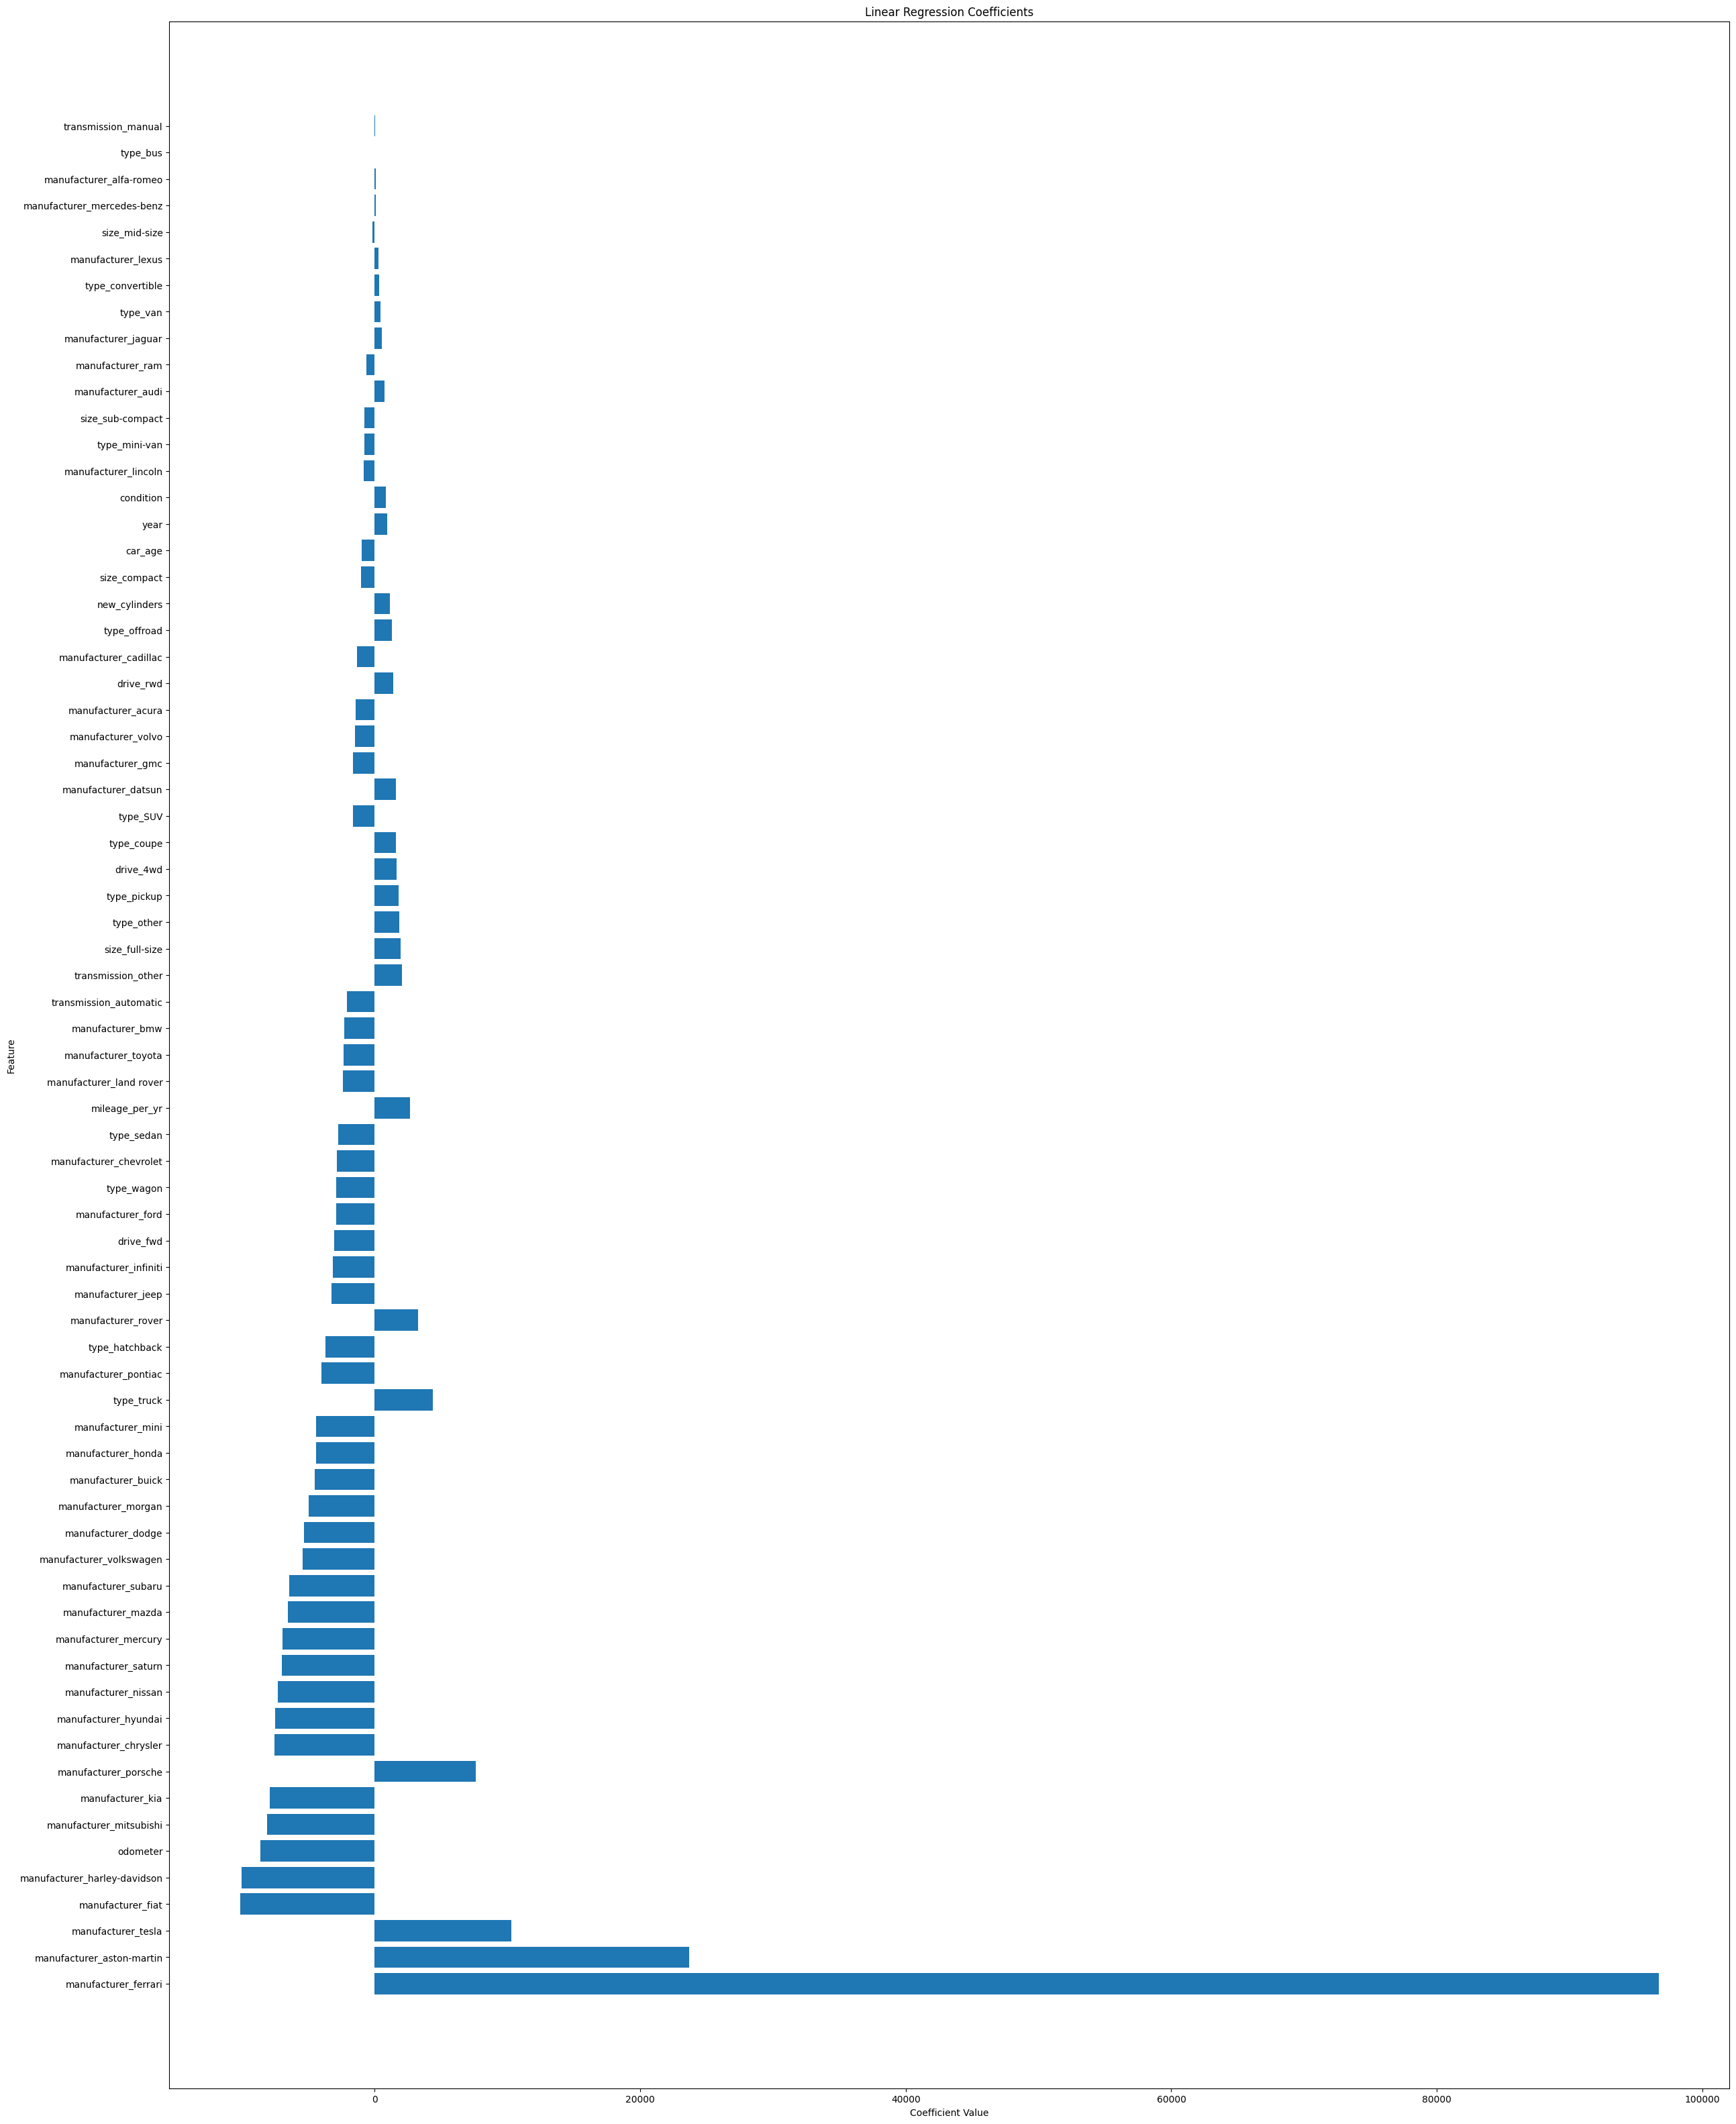

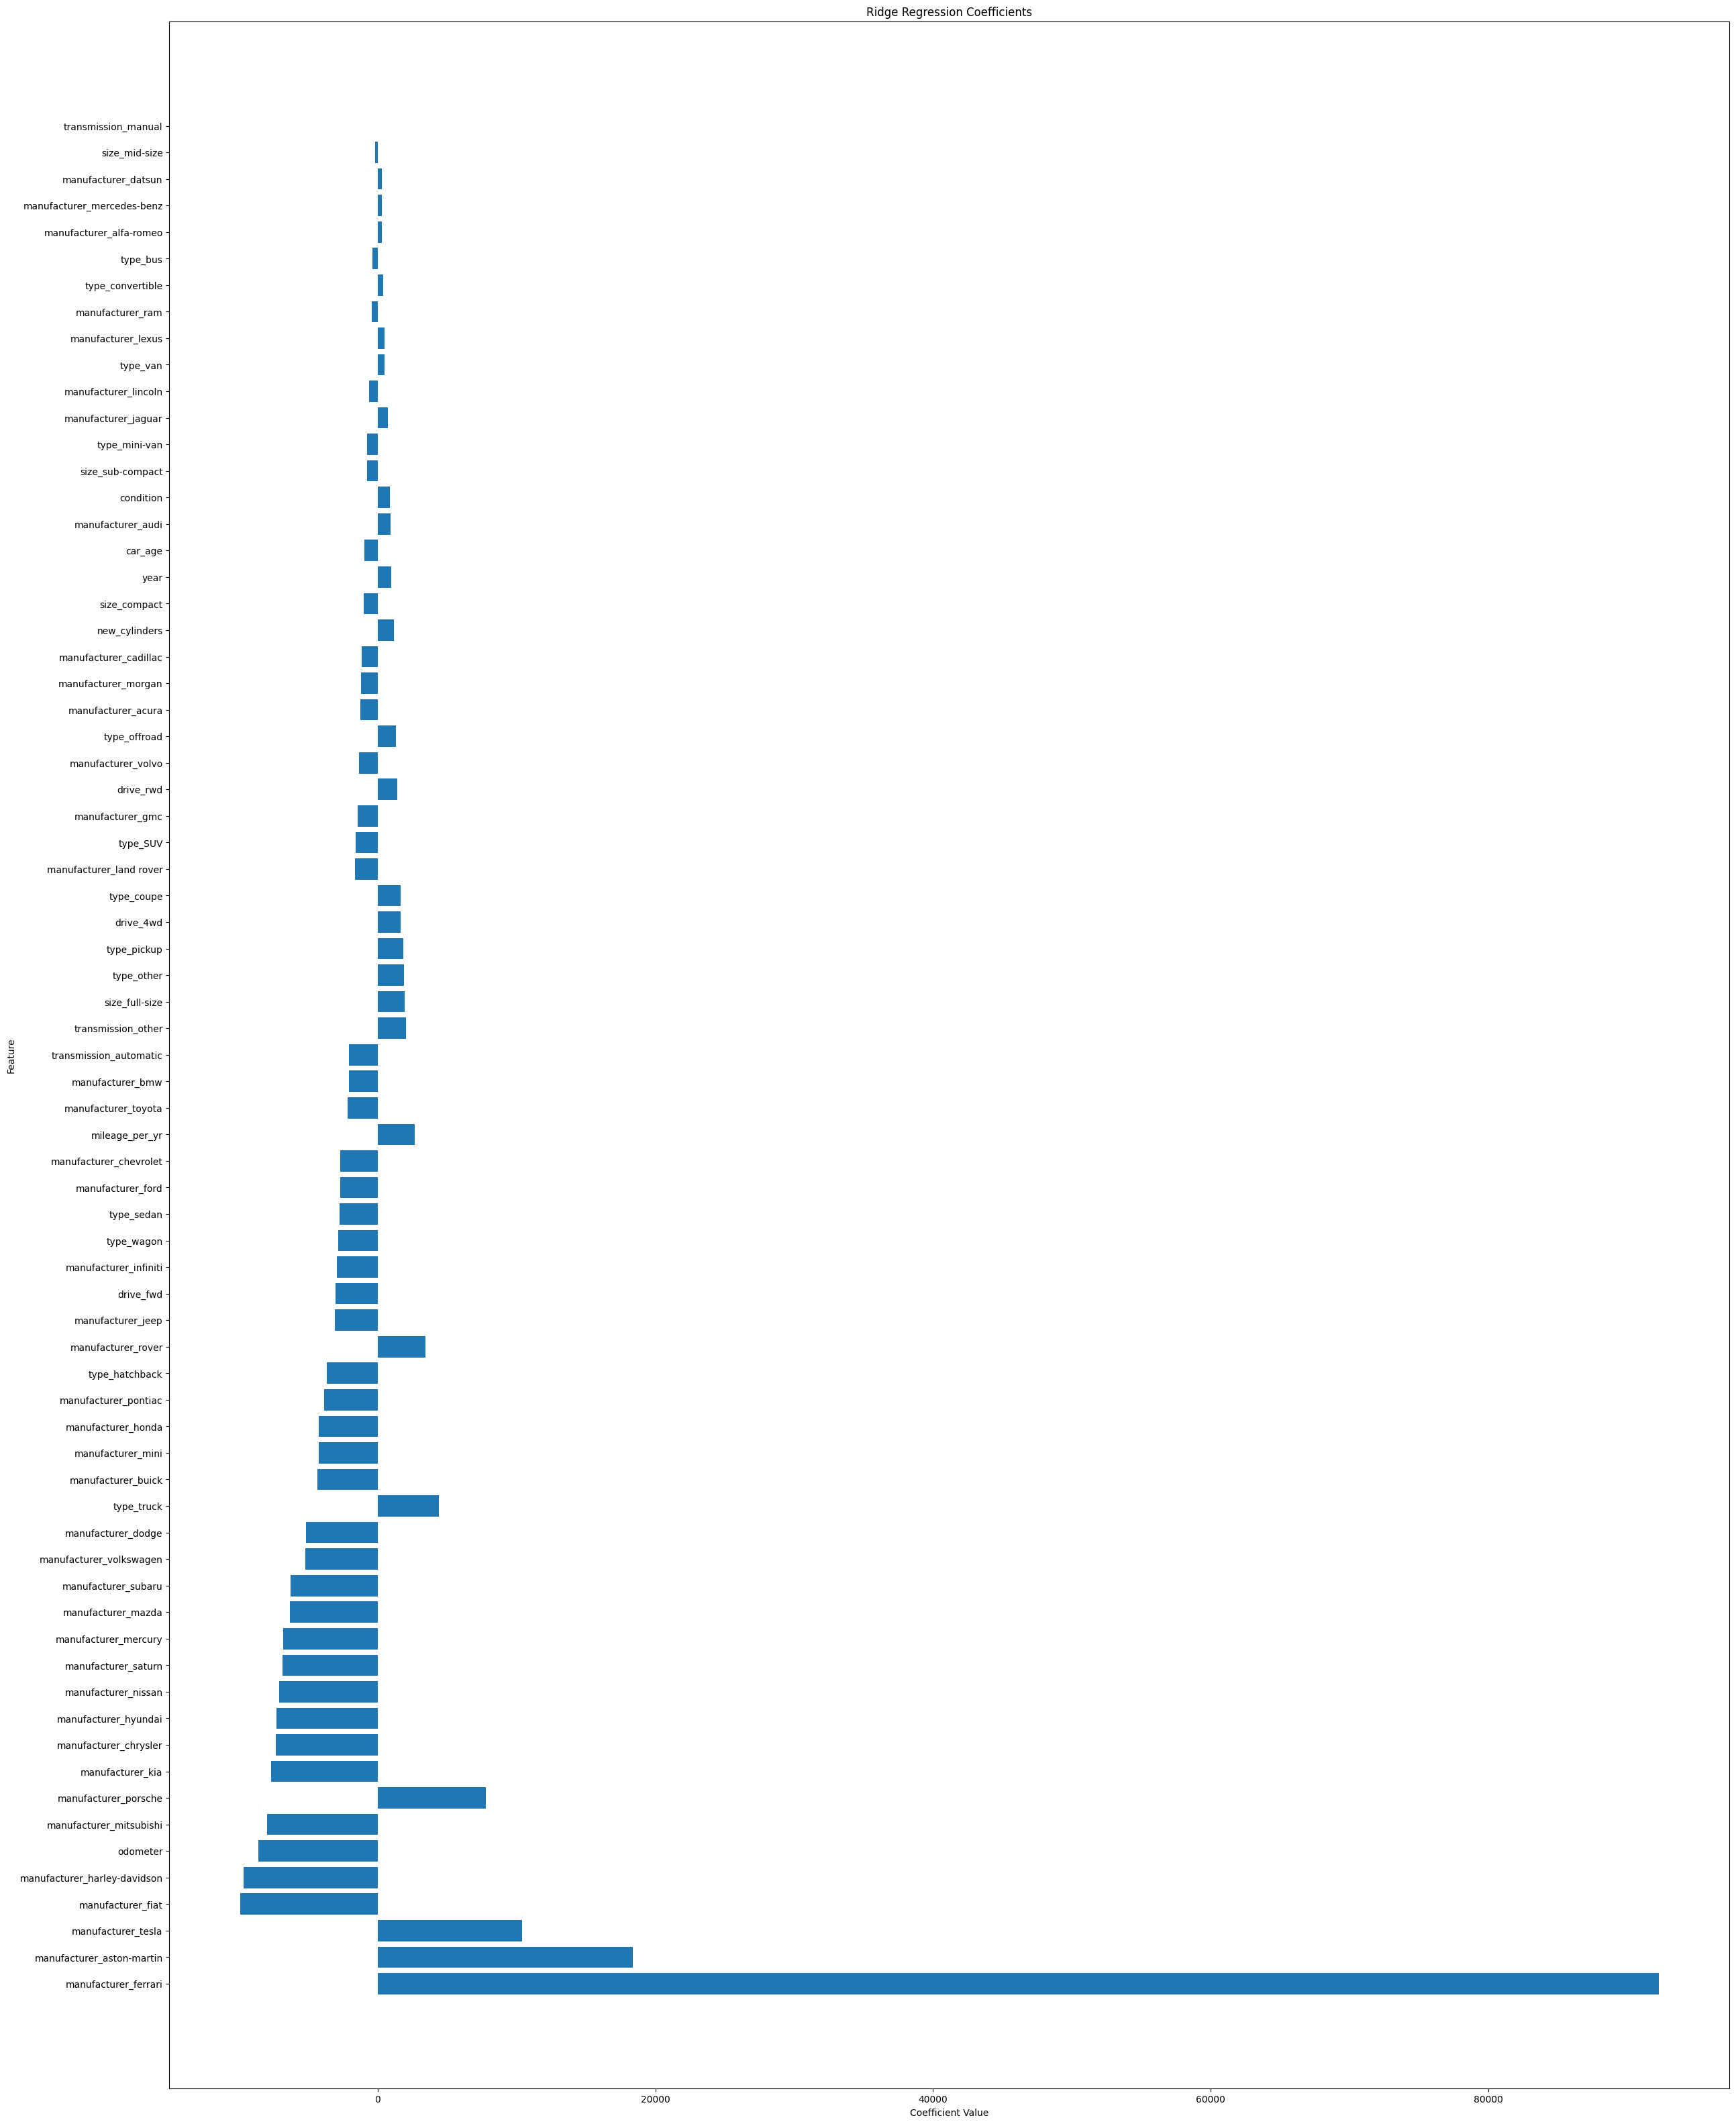

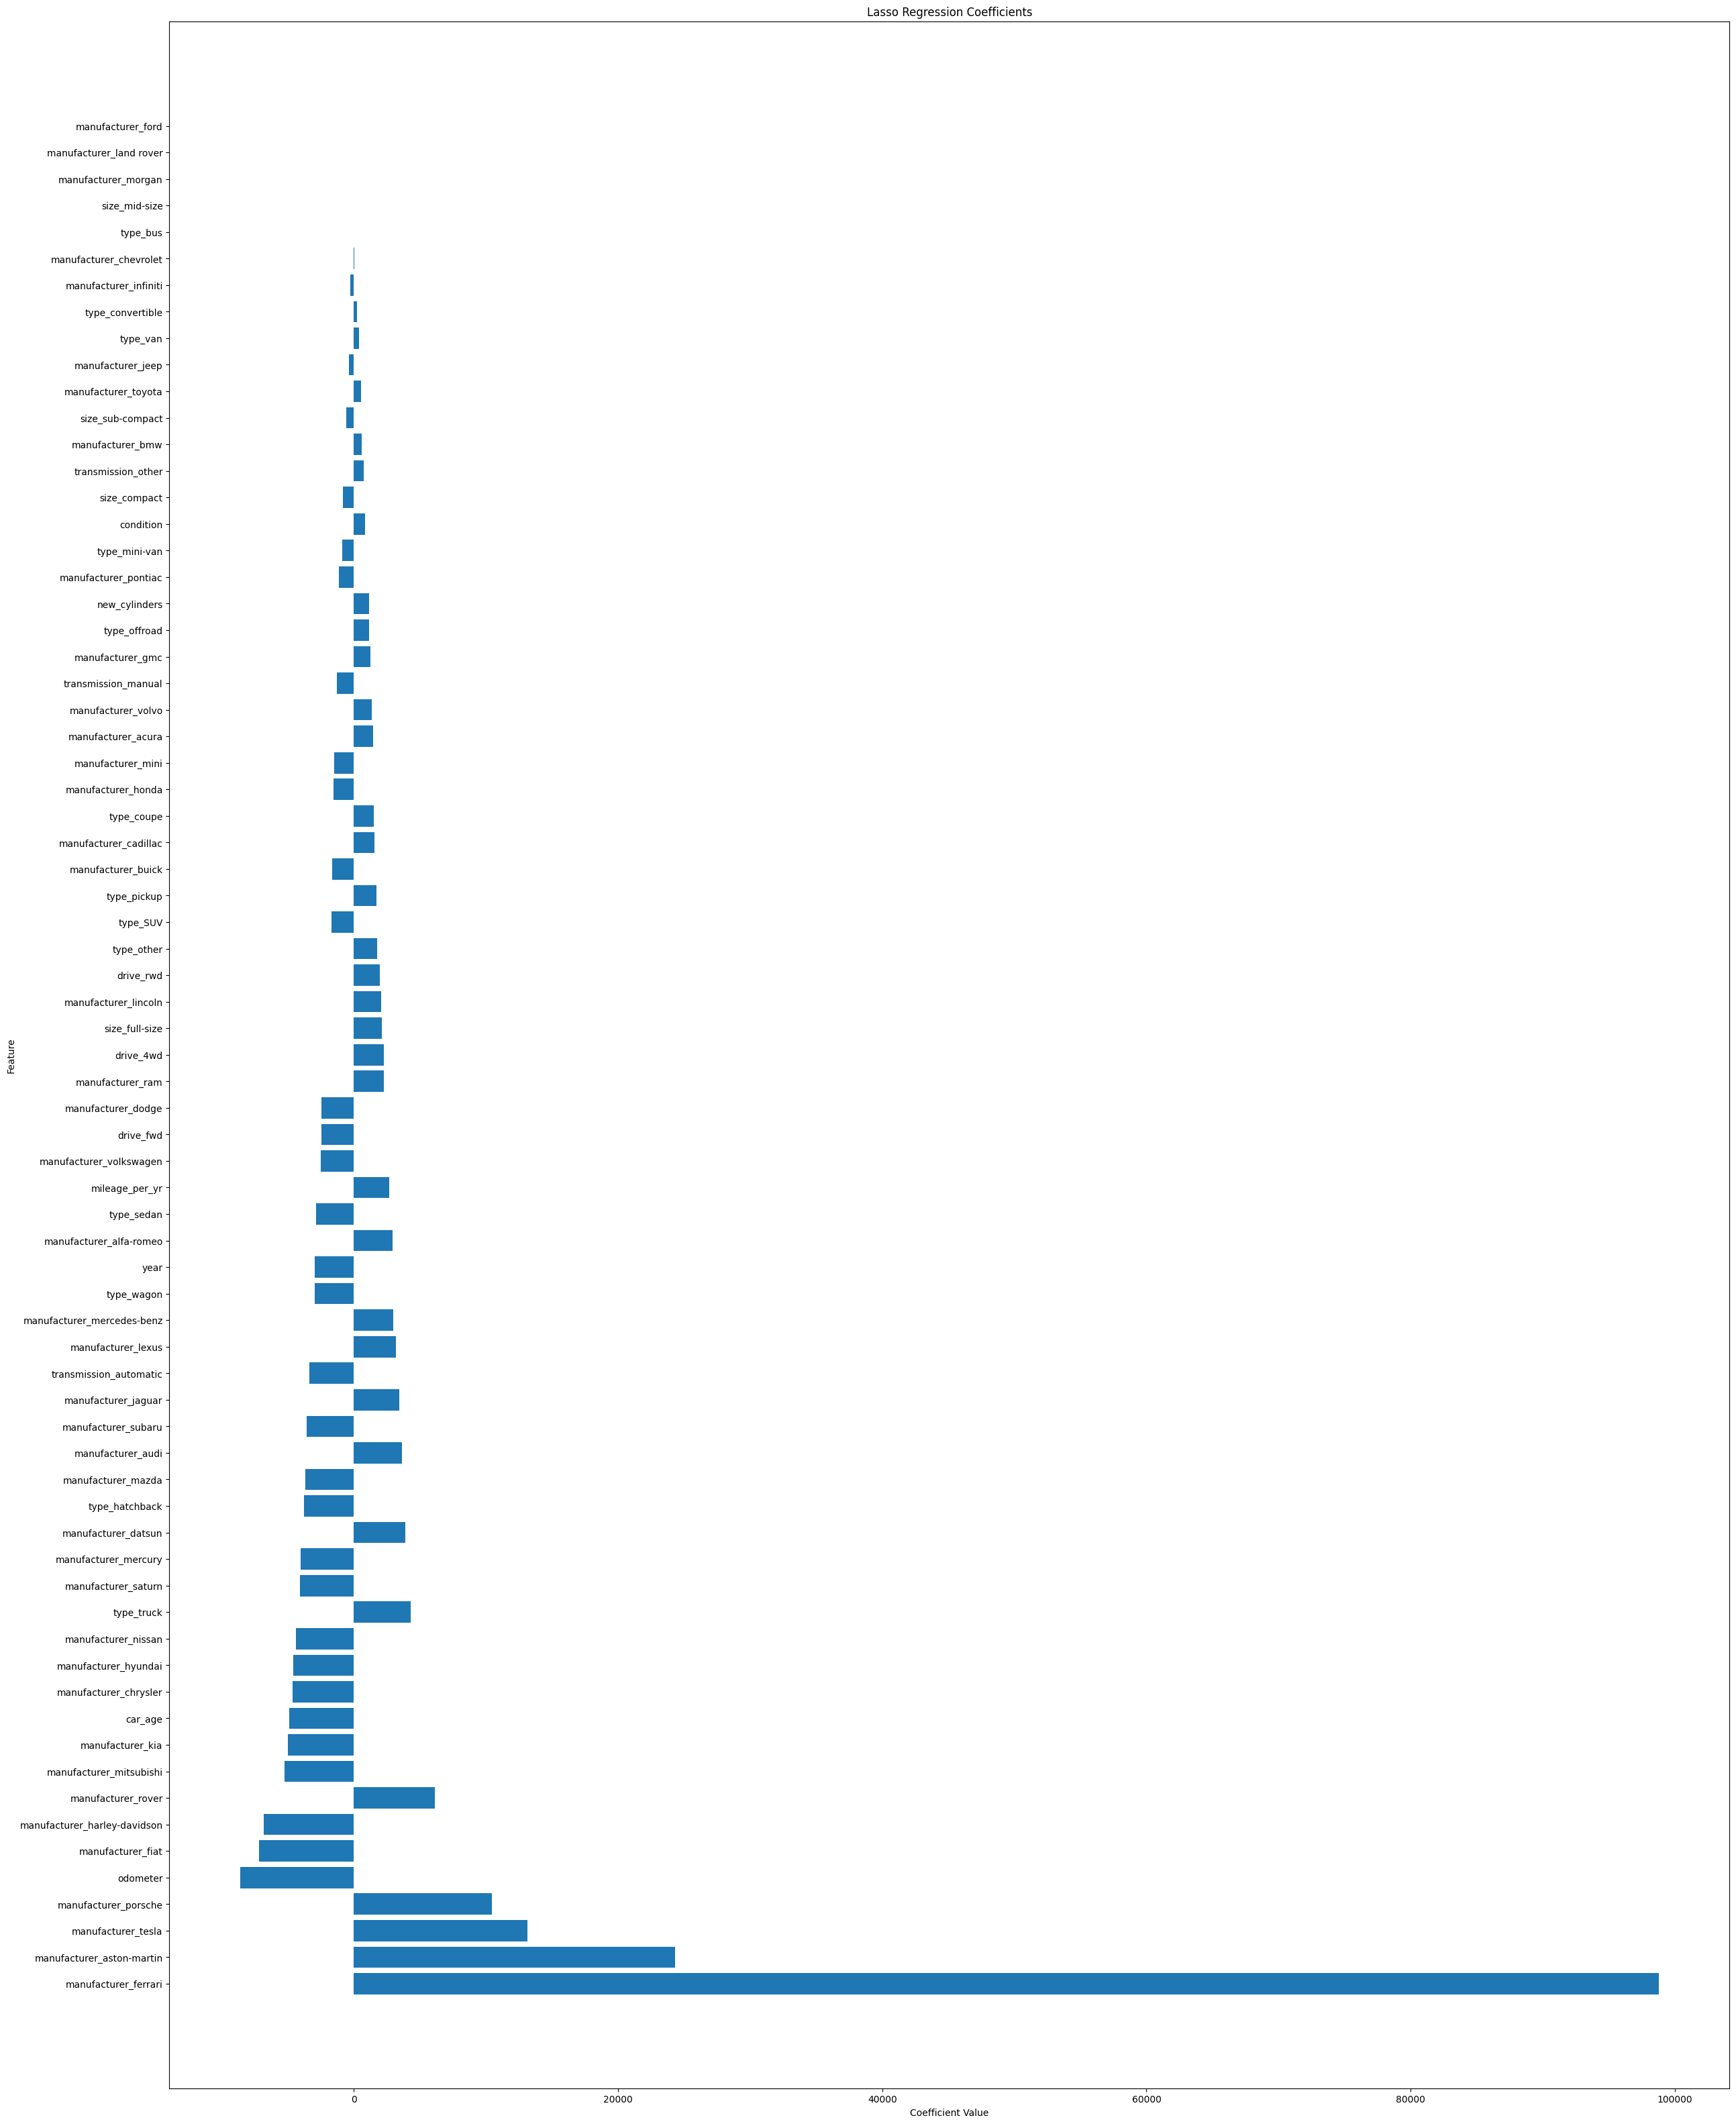

In [131]:
import matplotlib.pyplot as plt



# Plot the coefficients for Linear Regression
plt.figure(figsize=(30, 40))
plt.barh(coef_df_lr['Feature'], coef_df_lr['Coefficient'])
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Plot the coefficients for Ridge
plt.figure(figsize=(30, 40))
plt.barh(coef_df_ridge['Feature'], coef_df_ridge['Coefficient'])
plt.title('Ridge Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Plot the coefficients for Lasso
plt.figure(figsize=(30, 40))
plt.barh(coef_df_lasso['Feature'], coef_df_lasso['Coefficient'])
plt.title('Lasso Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Evaluation
.Use different metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² Score. Use cross validation to validate performance across different folds and GridSearchCV to find best alpha parameters for Ridge and Lasso models.

In [132]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Linear Regression metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr =root_mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Ridge Regression metrics
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge =root_mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)  # R-squared for Ridge Regression

# Lasso Regression metrics
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso =root_mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)  # R-squared for Lasso Regression

# Step 5: Print evaluation metrics for each model
print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f} , R²: {r2_lr:.4f}\n")

print("Ridge Regression Performance:")
print(f"MAE: {mae_ridge:.4f}, RMSE: {rmse_ridge:.4f},  R²: {r2_ridge:.4f}\n")

print("Lasso Regression Performance:")
print(f"MAE: {mae_lasso:.4f}, RMSE: {rmse_lasso:.4f} , R²: {r2_lasso:.4f}")



Linear Regression Performance:
MAE: 5804.9397, RMSE: 8661.4886 , R²: 0.5936

Ridge Regression Performance:
MAE: 5804.7655, RMSE: 8661.9171,  R²: 0.5935

Lasso Regression Performance:
MAE: 5804.6783, RMSE: 8661.8557 , R²: 0.5935


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Executive Summary
This analysis of  the Used Vehicle dataset aimed to identify key drivers that influence price, using various car attributes. 

Model Performance:
Lasso Regression turned out to be slightly better but all models effectively performed the same. Linear and Lasso Regression performed almost identically , with Lasso having the lease MAE and matching the best R square score. Ridge Regression slightly underperformed in all metrics compared to the others. However the difference was very minor hence statistically all three models performed similarly.

Key Drivers:
The most crucial factors for driving Price were identified as Manufacturer and Odometer by Linear and Ridge Regression. Lasso additionally identified Car Age as a key attribute that drove prices. Luxury Vehicles with Manufacturers like Aston Martin , Ferrari, Tesla , Porsche drove inventory will have drive used vehicles prices higher and lower end vehicles like Fiat, Mitsubishi, Kia ,and Nissan will not achieve much higher prices/gains. The Odometer , followed by Car Age have an inverse relationship with Price. 


